In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# make dictionary of latitudes/longitudes
lat_lons = {
            'lon_-120': [-120.0, (40.0,50.0,60.0,70.0)],
            'lon_-60': [-60.0, (-30.0,-20.0,-10.0,0.0)],
            'lon_0': [0.0, (10.0,20.0,30.0,40.0,50.0)],
            'lon_60': [60.0, (30.0,40.0,50.0,60.0)],
            'lon_120': [120.0, (30.0,40.0,50.0,60.0,70.0)]
            }


-120.0
40.0
orig geom list size (4, 14)
(array([ 1,  2,  3,  4,  6,  8,  9, 10, 11, 12]),)
new geom list size (4, 10)
50.0
orig geom list size (4, 18)
(array([ 2,  3,  4,  5,  6,  9, 10, 11, 12, 13, 14, 15]),)
new geom list size (4, 12)
60.0
orig geom list size (4, 25)
(array([ 2,  3,  4,  5,  6,  8, 10, 11, 14, 17, 18, 19, 20, 21, 22]),)
new geom list size (4, 15)
70.0
orig geom list size (4, 40)
(array([ 5,  6,  7,  8,  9, 11, 13, 14, 17, 19, 20, 21, 22, 24, 26, 28, 29,
       31, 32, 33, 34, 35]),)
new geom list size (4, 22)
-60.0
-30.0
orig geom list size (4, 16)
(array([ 0,  1,  2,  3,  4,  8,  9, 10, 11, 12, 13, 14]),)
new geom list size (4, 12)
-20.0
orig geom list size (4, 13)
(array([ 0,  1,  2,  3,  6,  7,  8,  9, 10]),)
new geom list size (4, 9)
-10.0
orig geom list size (4, 11)
(array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10]),)
new geom list size (4, 10)
0.0
orig geom list size (4, 12)
(array([ 1,  2,  3,  4,  7,  8,  9, 10]),)
new geom list size (4, 8)
0.0
10.0
orig geom l

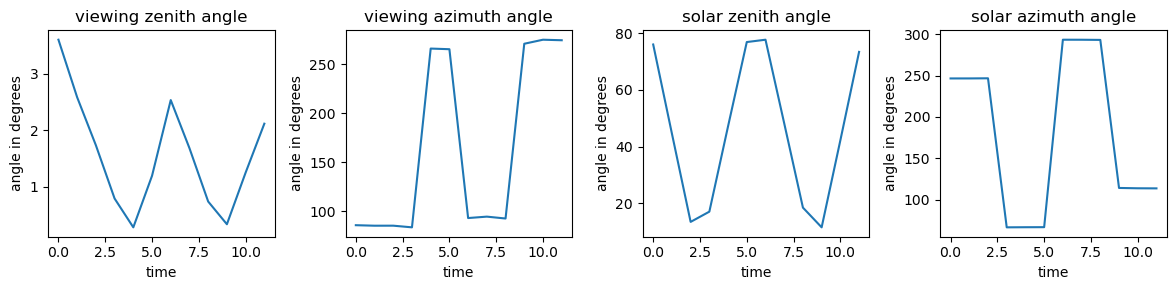

In [3]:
#Lat0.0_Lon-60.0_overpasses_stepfine0.10s_stepcoarse5.00s_mindistkm50.00km
filefolder='/home/users/ndouglas/TRUTHS/Geometries/TRUTHS/truths_orbit_for_reading-20250908T114401Z-1-001/truths_orbit_for_reading/'
filepathext='_overpasses_stepfine0.10s_stepcoarse5.00s_mindistkm50.00km.csv'
latlon_keys = list(lat_lons.keys())

for lonref in latlon_keys:
    longitude=lat_lons[lonref][0]
    print(longitude)
    for latitude in lat_lons[lonref][1]:
        print(latitude)
        filepath=filefolder+'Lat'+str(latitude)+'_Lon'+str(longitude)+filepathext
        df1 = pd.read_csv(filepath)
        list_vza = np.array(df1['view_zenith_angle_deg'].tolist())
        list_solaa = np.array(df1['solar_azimuth_deg'].tolist())
        list_solea = np.array(df1['solar_elevation_deg'].tolist())
        list_sataa = np.array(df1['satellite_azimuth_deg'].tolist())
        #list_vaa_temp = list_sataa - list_solaa
        #list_vaa = [min(np.abs(element), 360 - np.abs(element)) for element in list_vaa_temp]
        list_vaa = list_sataa
        list_solza = [90 - element for element in list_solea]
        geomList=[list_vza, list_vaa, list_solza, list_solaa]
        print('orig geom list size',np.shape(geomList))
        keep=np.where(np.array(list_solza)<70.0)
        print(keep)
        geom_list=[np.array(list_vza)[keep], np.array(list_vaa)[keep], np.array(list_solza)[keep], np.array(list_solaa)[keep]]
        print('new geom list size',np.shape(geom_list))

        with open('/home/users/ndouglas/TRUTHS/Geometries/TRUTHS/TRUTHSgeometries/TRUTHSgeomsLAT'+str(latitude)+'LON'+str(longitude)+'.brdf',"w") as f:
            f.write('BRDF '+str(len(keep[0]))+' 11 492.4 559.8 664.6 704.1 740.5 782.8 832.8 864.7 945.1 1613.7 2202.4\n')
            for m in range(0,len(keep[0])):
                for n in range(0,4):
                    f.write("%f "%geom_list[n][m])        
                f.write("\n")

        if latitude == 0.0 and longitude==-60.0:
            fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(12, 3))
            ax1.plot(list_vza)
            ax1.set_title('viewing zenith angle')
            ax1.set_xlabel('time')
            ax1.set_ylabel('angle in degrees')
            ax2.plot(list_vaa)
            ax2.set_xlabel('time')
            ax2.set_ylabel('angle in degrees')
            ax2.set_title('viewing azimuth angle')
            ax3.plot(list_solza)
            ax3.set_title('solar zenith angle')
            ax3.set_xlabel('time')
            ax3.set_ylabel('angle in degrees')
            ax4.plot(list_solaa)
            ax4.set_title('solar azimuth angle')
            ax4.set_xlabel('time')
            ax4.set_ylabel('angle in degrees')
            plt.tight_layout()